In [7]:
from numpy import exp, meshgrid, sum, linspace, sqrt, diff
from numpy.random import rand, randint
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

In [8]:
class Ising():

    # initialization
    def __init__(self, temperature, lattice, iterations, plots=True):
        self.temperature = temperature
        self.lattice = lattice
        self.iterations = iterations
        self.plots = plots

    # energy of the crystal
    def E(self, crystal, lattice):
        energy = 0
        for i in range(len(crystal)):
            for j in range(len(crystal)):
                S = crystal[i, j]
                nb = crystal[(i + 1) % lattice, j] + crystal[i, (j + 1) % lattice] + \
                    crystal[(i - 1) % lattice, j] + \
                    crystal[i, (j - 1) % lattice]
                if ((i+1) % 2 == 0):
                    nb += crystal[(i - 1) % lattice, (j - 1) % lattice] + \
                        crystal[(i + 1) % lattice, (j - 1) % lattice]
                else:
                    nb += crystal[(i + 1) % lattice, (j + 1) % lattice] + \
                        crystal[(i - 1) % lattice, (j + 1) % lattice]
                energy += -nb * S
        return energy / 6.

    # magnetization of crystal
    def M(self, crystal):
        mag = sum(crystal)
        return mag

    # monte carlo steps
    def mcStep(self, crystal, lattice, beta):
        for i in range(lattice):
            for j in range(lattice):
                a = randint(0, lattice)
                b = randint(0, lattice)
                s = crystal[a, b]
                nb = crystal[(a + 1) % lattice, b] + crystal[a, (b + 1) % lattice] + \
                    crystal[(a - 1) % lattice, b] + \
                    crystal[a, (b - 1) % lattice]
                if ((a + 1) % 2 == 0):
                    nb += crystal[(a - 1) % lattice, (b - 1) % lattice] + \
                        crystal[(a + 1) % lattice, (b - 1) % lattice]
                else:
                    nb += crystal[(a + 1) % lattice, (b + 1) % lattice] + \
                        crystal[(a - 1) % lattice, (b + 1) % lattice]
                metric = 2 * s * nb
                if metric < 0:
                    s *= -1
                elif rand() < exp(-metric * beta):
                    s *= -1
                crystal[a, b] = s
        return crystal

    # simulate the crystal
    def simulate(self):
        E = 0
        M = 0
        crystal = 2 * randint(2, size=(self.lattice, self.lattice)) - 1

        if self.plots:
            f = plt.figure(figsize=(15, 15))
            self.configPlotHex(f, crystal, 0, self.lattice, 1)

        for i in range(self.iterations):
            self.mcStep(crystal, self.lattice, 1.0 / self.temperature)
            if self.plots:
                if i == 1:
                    self.configPlotHex(f, crystal, i, self.lattice, 2)
                if i == 4:
                    self.configPlotHex(f, crystal, i, self.lattice, 3)
                if i == 32:
                    self.configPlotHex(f, crystal, i, self.lattice, 4)
                if i == 100:
                    self.configPlotHex(f, crystal, i, self.lattice, 5)
                if i == self.iterations - 1:
                    self.configPlotHex(f, crystal, i, self.lattice, 6)
            E += self.E(crystal, self.lattice)
            M += self.M(crystal)
            
        if self.plots:
            plt.show()

        return [E, M]

    # configure hex plot
    def configPlotHex(self, f, crystal, i, lattice, n_):
        nx = lattice
        ny = lattice
        cmap = colors.ListedColormap(["black", "white"])
        bounds = [0, 1, 2]
        norm = colors.BoundaryNorm(bounds, cmap.N)
        x = linspace(0, 1, nx)
        y = linspace(0, 1, ny)

        dx = diff(x)[0]
        dy = diff(y)[0]

        patches = []
        for k in x:
            for n, j in enumerate(y):
                if n % 2:
                    polygon = mpatches.RegularPolygon([k - dx / 2.0, j], 6, 0.6 * dx)
                else:
                    polygon = mpatches.RegularPolygon([k, j], 6, 0.6 * dx)
                patches.append(polygon)

        collection = PatchCollection(patches, cmap=cmap, norm=norm, alpha=1.0)

        sp = f.add_subplot(3, 3, n_)
        sp.set_xticks([])
        sp.set_yticks([])
        sp.add_collection(collection)
        collection.set_array(crystal.ravel())
        sp.set_title('Time=%d' % i)
        sp.axis('tight')


    # make a single plot
    def configPlot(self, f, crystal, i, lattice, n_):
        X, Y = meshgrid(range(lattice), range(lattice))
        X, Y = X * 2, Y * 2

        # Turn this into a hexagonal grid
        for ii, k in enumerate(X):
            if ii % 2 == 1:
                X[ii] += 1
                Y[:, ii] += 1

        sp = f.add_subplot(3, 3, n_)
        sp.set_xticks([])
        sp.set_yticks([])
        im = sp.hexbin(X.reshape(-1),
                       Y.reshape(-1),
                       C=crystal.reshape(-1),
                       gridsize=int(crystal.shape[0] / 2), cmap=plt.cm.binary, linewidths=0.0)
        sp.set_title('Time=%d' % i)
        sp.axis('tight')
        divider = make_axes_locatable(sp)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        f.colorbar(im, cax=cax, orientation='vertical')


/var/folders/qv/m5xj0__d3rq5z43z7vy8pvmr0000gn/T/ipykernel_16454/955588585.py:107: MatplotlibDeprecationWarning: Passing the radius parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = mpatches.RegularPolygon([k, j], 6, 0.6 * dx)
/var/folders/qv/m5xj0__d3rq5z43z7vy8pvmr0000gn/T/ipykernel_16454/955588585.py:105: MatplotlibDeprecationWarning: Passing the radius parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = mpatches.RegularPolygon([k - dx / 2.0, j], 6, 0.6 * dx)


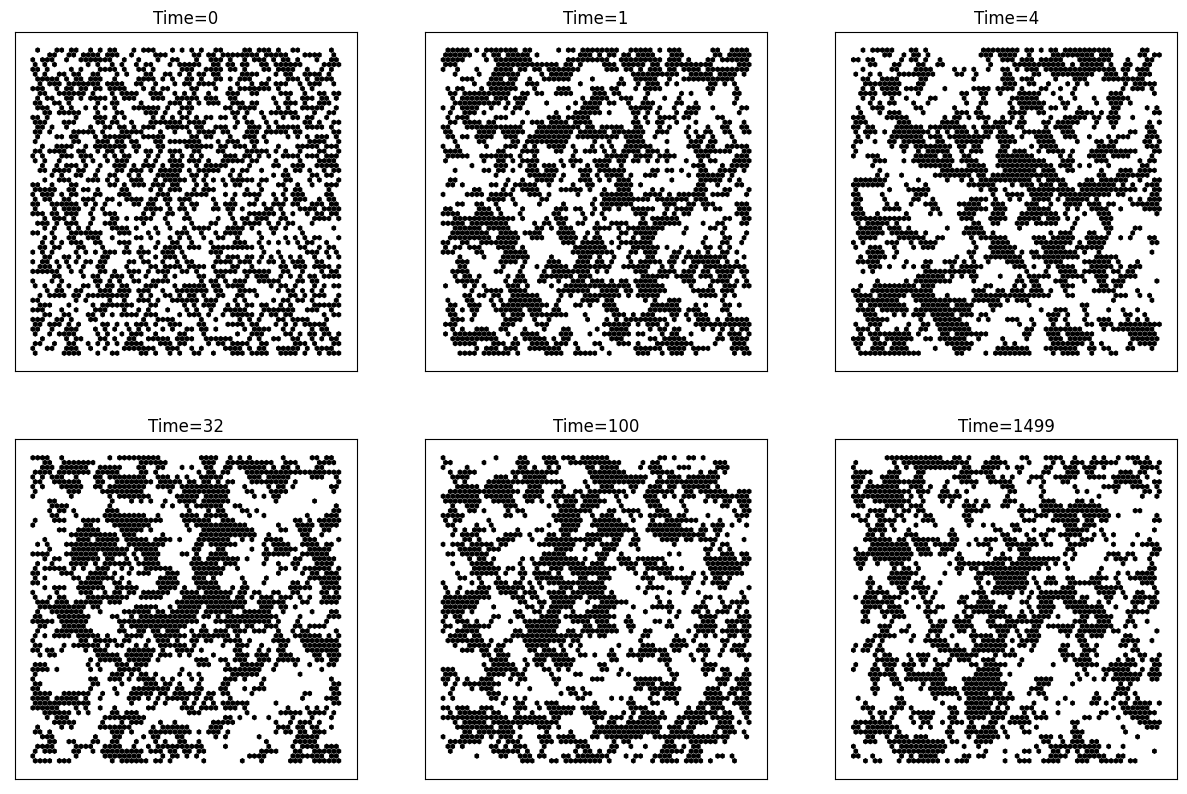

[-2026154.6666666674, 12564]

In [9]:
T = 5.0
lattice = 64
iterations = 1500
model = Ising(T, lattice, iterations, True)
model.simulate()